### AMAZON STOCKS ANALYSIS

### Introduction
Stock market data provides valuable insights into market behavior, volatility, and long-term trends. In this project, we analyze the historical stock price data of Amazon (AMZN) to explore its performance over time.
Using Python (Pandas, Matplotlib, NumPy), we clean and process the dataset, handle missing values and duplicates, and perform exploratory data analysis (EDA). Various visualizations such as distribution plots, boxplots, and correlation heatmaps are used to better understand price patterns, seasonality, and relationships among stock features like Open, High, Low, Close, and Volume.
This project not only builds data analysis skills but also highlights how data visualization can simplify financial decision-making.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Amazon.csv")
print(df.head())


         Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200


In [2]:
df=df.drop_duplicates()
df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')  # sort by date
df.set_index('Date', inplace=True)  # set date as index for easy plotting

print("Data cleaned and ready for visualization")
print(df.describe())


Data cleaned and ready for visualization
              Open         High          Low        Close    Adj Close  \
count  5852.000000  5852.000000  5852.000000  5852.000000  5852.000000   
mean    377.469557   381.737827   372.815253   377.500736   377.500736   
std     596.291033   602.615299   589.226694   596.287464   596.287464   
min       1.406250     1.447917     1.312500     1.395833     1.395833   
25%      37.995000    38.590000    37.247501    37.950001    37.950001   
50%      83.699997    85.029999    82.055000    83.602501    83.602501   
75%     360.852501   365.794991   357.877510   362.217506   362.217506   
max    3251.060059  3344.290039  3165.429932  3225.000000  3225.000000   

             Volume  
count  5.852000e+03  
mean   7.512673e+06  
std    7.278144e+06  
min    4.872000e+05  
25%    3.681975e+06  
50%    5.652850e+06  
75%    8.517450e+06  
max    1.043292e+08  


### Closing price trend 

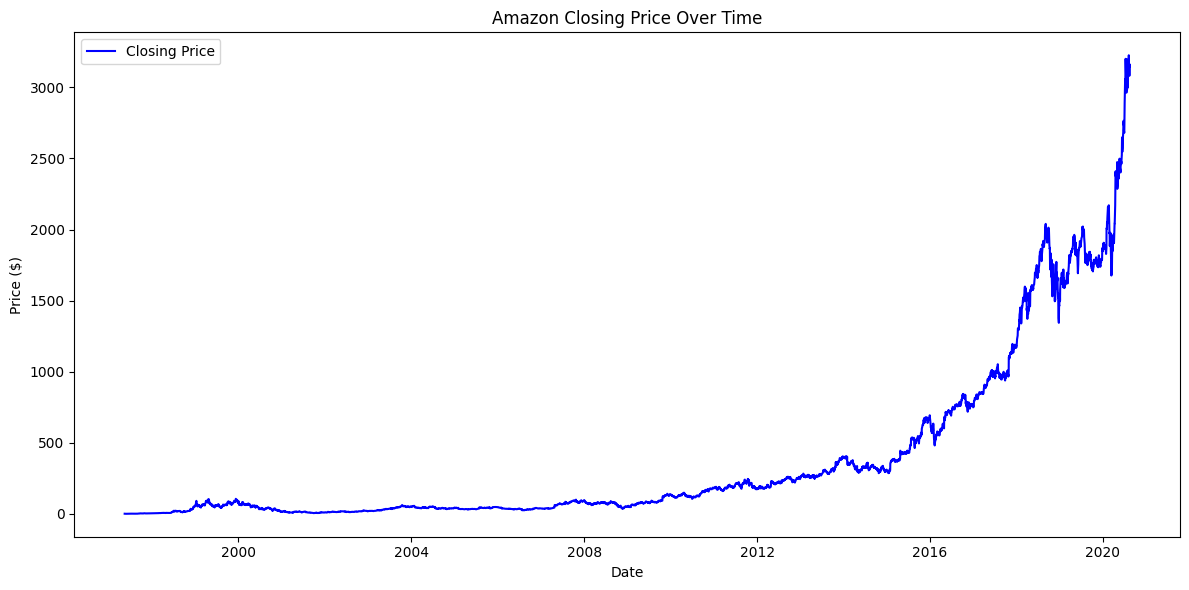

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price", color="blue")
plt.title("Amazon Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.tight_layout()
plt.show()

### Open vs Close Price

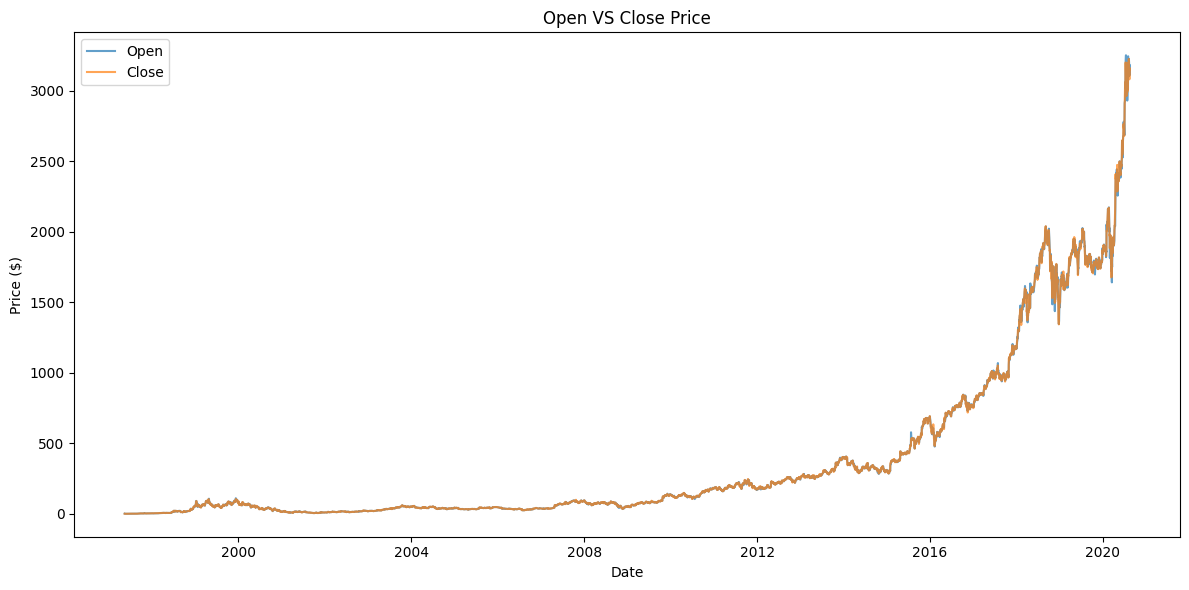

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label="Open", alpha=0.7)
plt.plot(df['Close'], label="Close",alpha=0.7)
plt.title("Open VS Close Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.tight_layout()
plt.show()

### Trading Volume

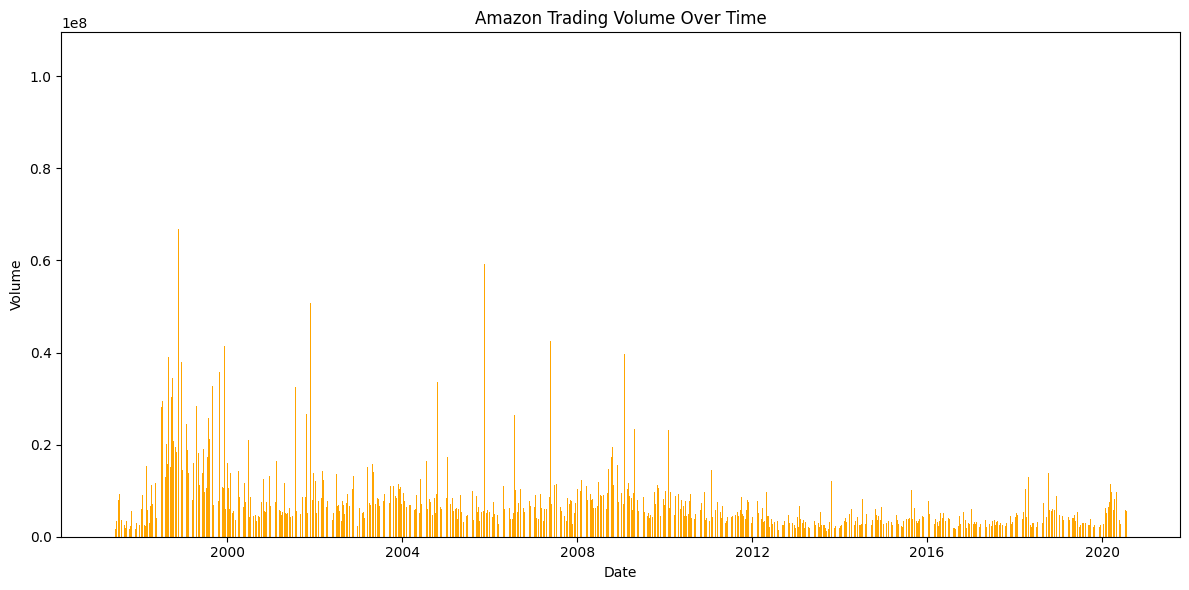

In [4]:
plt.figure(figsize=(12,6))
plt.bar(df.index, df['Volume'], color="orange")
plt.title("Amazon Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

### Daily Returns Distribution

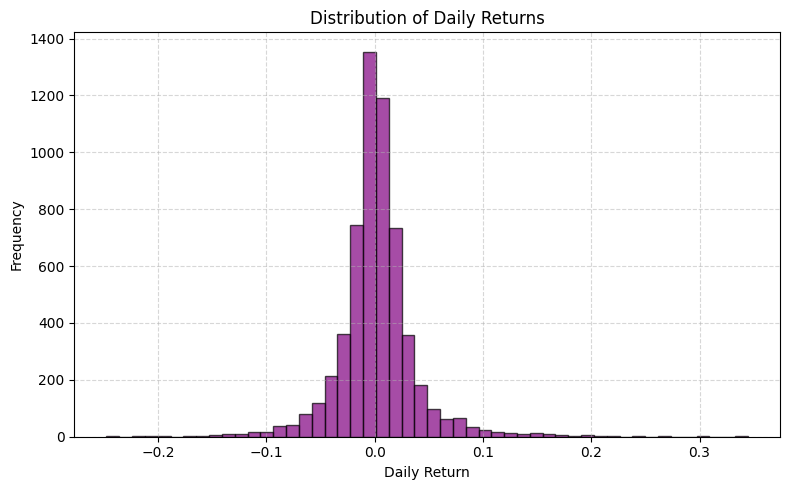

In [8]:

df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(8, 5))
plt.hist(df['Daily Return'].dropna(), bins=50, color="purple", alpha=0.7, edgecolor="black")
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



### Rolling Moving Averages

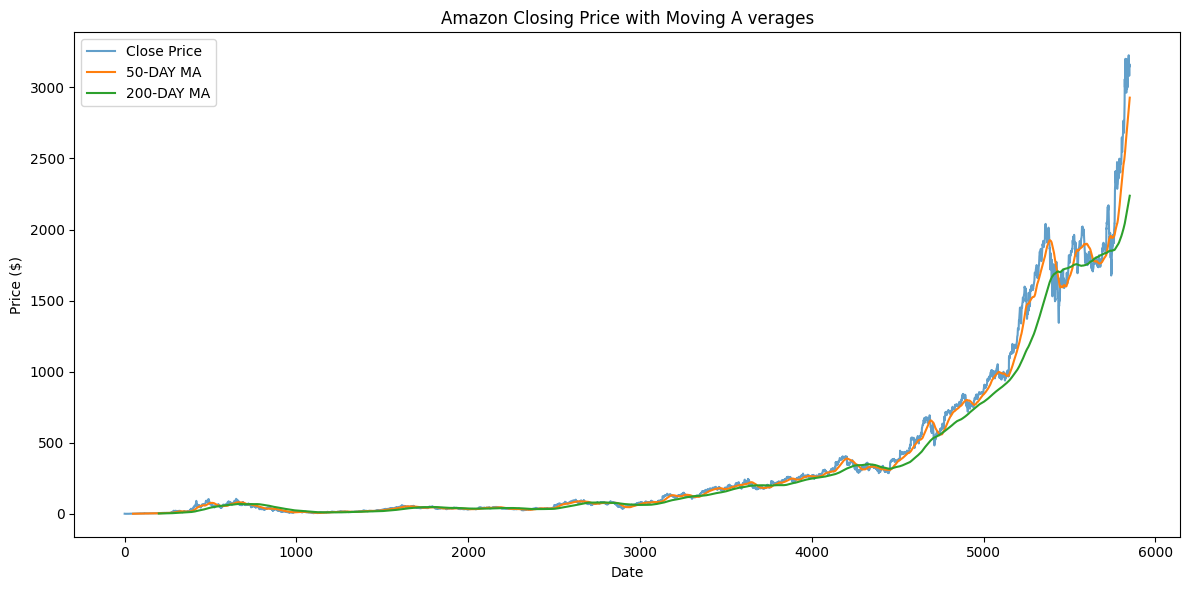

In [3]:
plt.figure(figsize=(12,6))
df['Close'].plot(label="Close Price", alpha=0.7)
df['Close'].rolling(window=50).mean().plot(label="50-DAY MA")
df['Close'].rolling(window=200).mean().plot(label="200-DAY MA")
plt.title("Amazon Closing Price with Moving A verages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.tight_layout()
plt.show()

### Volatility (Rolling Standard Deviation Of Returns)

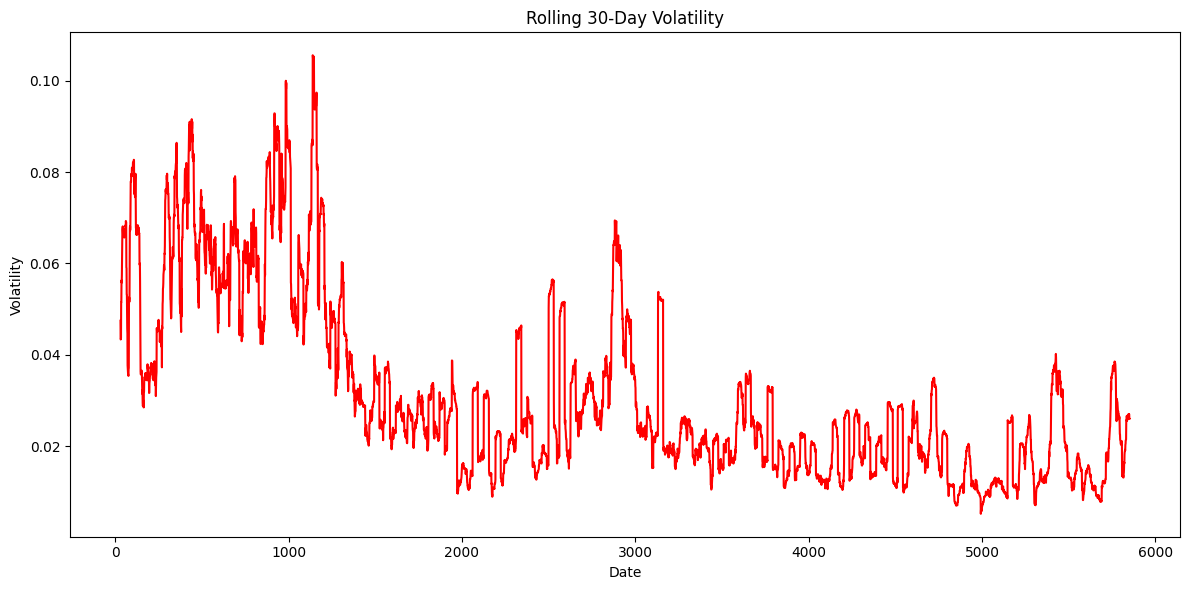

In [9]:
plt.figure(figsize=(12,6))
df['Daily Return'].rolling(window=30).std().plot(color="red")
plt.title("Rolling 30-Day Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
plt.show()

### Closing Price Yearly Distribution

<Figure size 1400x600 with 0 Axes>

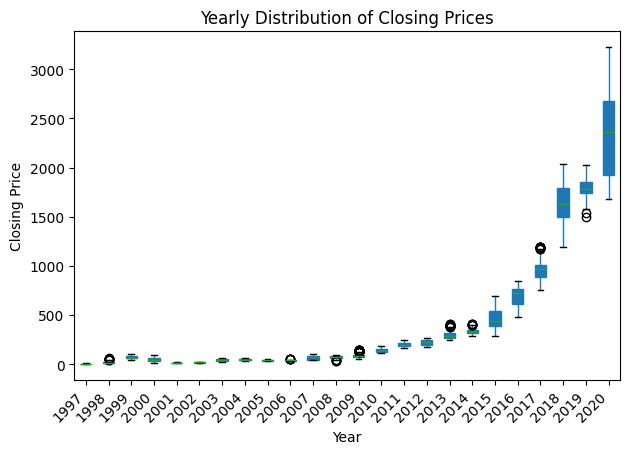

In [12]:
df['Year'] = pd.to_datetime(df['Date']).dt.year  
plt.figure(figsize=(14, 6))
df.boxplot(column='Close', by='Year', grid=False,patch_artist=True)
plt.title("Yearly Distribution of Closing Prices")
plt.suptitle("")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Correlation Heatmap

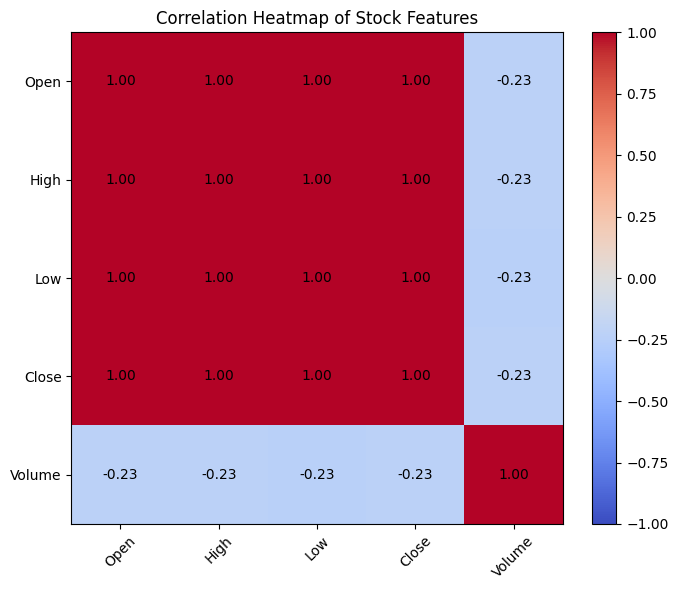

In [13]:
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.figure(figsize=(8, 6))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black")

plt.title("Correlation Heatmap of Stock Features")
plt.tight_layout()
plt.show()

### Conclusion
Through this project, we successfully analyzed Amazon’s stock dataset, applied data cleaning techniques, and generated meaningful visualizations. The results revealed key insights into Amazon’s stock performance, including price distribution, yearly seasonality, and correlations between different financial indicators.
Such an analysis can assist investors, analysts, and researchers in identifying trends and making informed decisions. Future extensions of this project could involve adding machine learning models for stock price prediction, integrating real-time stock APIs, or comparing Amazon’s stock with its competitors.